<a href="https://colab.research.google.com/github/Sursuri69/Machine-Learning-LAB/blob/main/Practical%20-%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
file_path = "Behaviour_Survey_responses.csv"
df = pd.read_csv("Customer_Behaviour_Survey_responses.csv")
print("Dataset is Loaded")

Dataset is Loaded


In [50]:
# Drop irrelevant columns
columns_to_drop = [
    "Timestamp", "Current State or Union Territory", "City",
    "Which product among Electronics do you shop very often?",
    "Which product among Fashion do you shop very often?",
    "Which product among Clothing do you shop very often?",
    "Which OTT subscriptions do you use the most?",
    "Which type of Books do you buy the most?"
]
df_cleaned = df.drop(columns=columns_to_drop)


In [51]:
# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

In [52]:
# Clean column names by stripping spaces
df_cleaned.columns = df_cleaned.columns.str.strip()

In [53]:
# Encode categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

In [54]:
# Define features (X) and target variable (y)
target_column = "On a scale of 1 to 5 , how often do you shop in the selected product category monthly?"
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]


In [55]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Train Decision Tree models with depths 3, 4, and 5
depths = [3, 4, 5]
models = {}
for depth in depths:
    model = DecisionTreeClassifier(max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    models[depth] = model

Depth 3 Accuracy: 0.3137
Confusion Matrix:
[[10  0  3  3  0]
 [ 3  1  1  6  0]
 [ 3  0  1  3  0]
 [ 2  0  1  4  0]
 [ 2  0  0  8  0]]



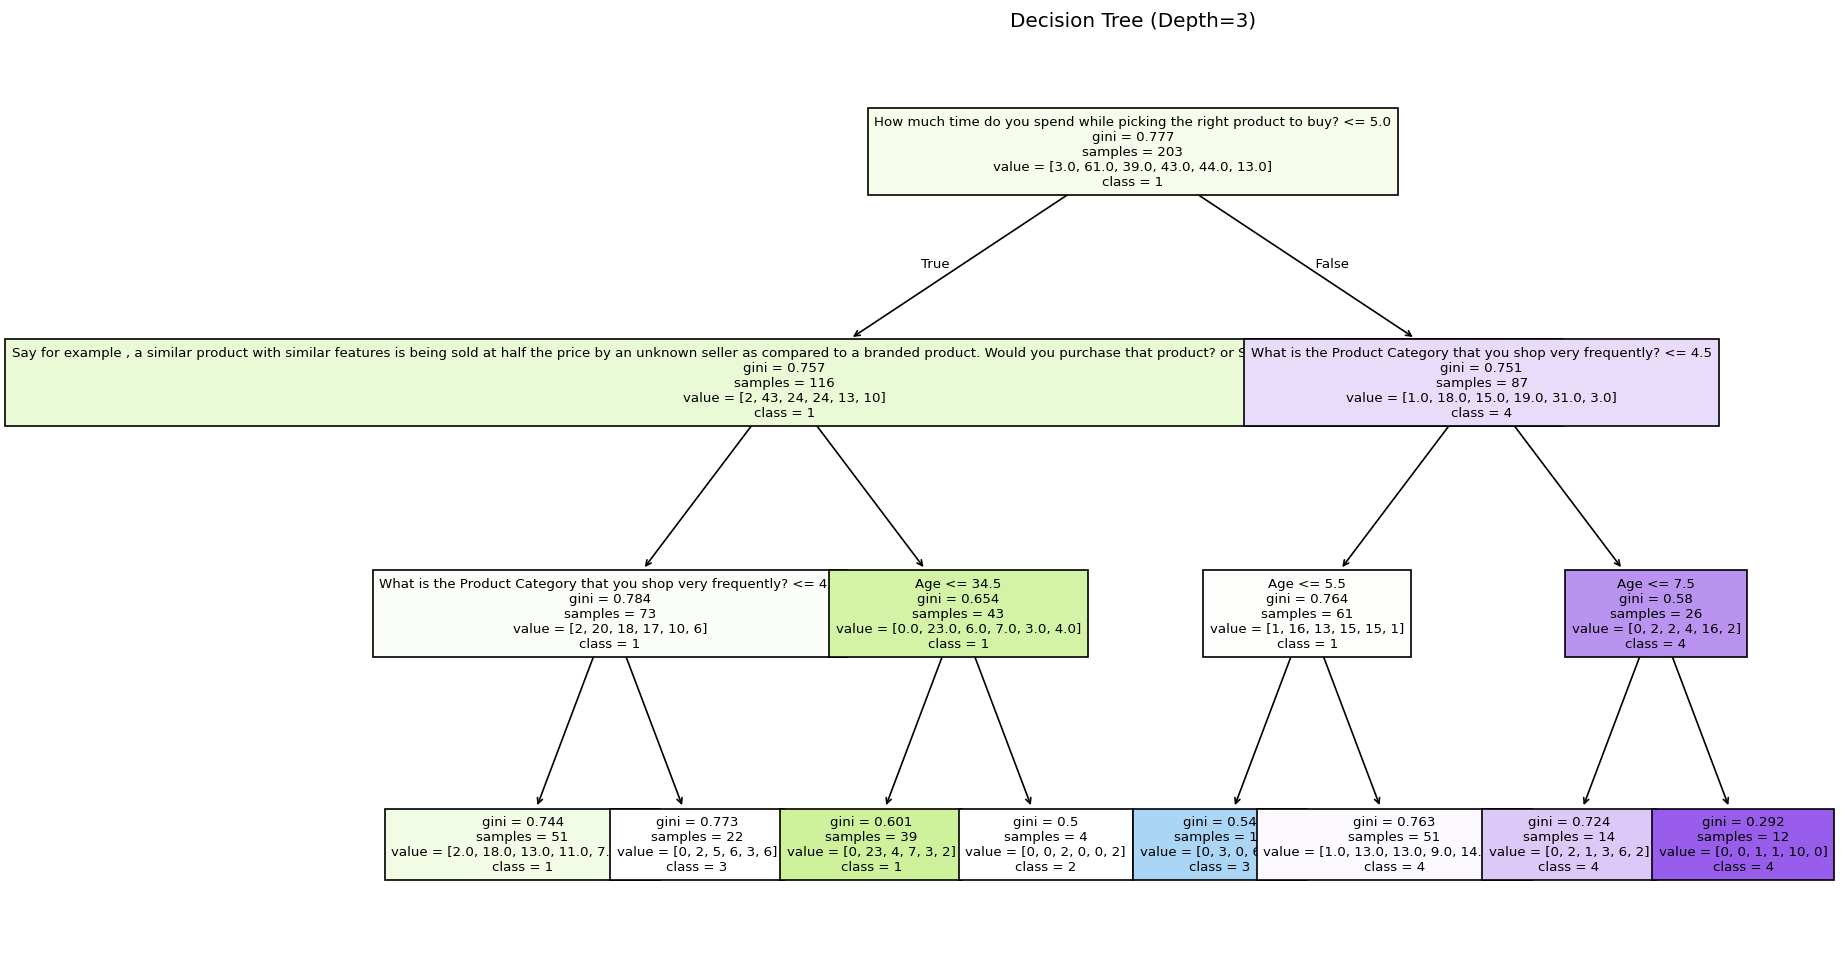

In [58]:

# Train, evaluate, and visualize decision tree with depth 3
model_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
print(f"Depth 3 Accuracy: {accuracy_score(y_test, y_pred_3):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_3)}\n")
plt.figure(figsize=(15, 10), dpi=120)
plot_tree(model_3, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=8)
plt.title("Decision Tree (Depth=3)")
plt.show()